In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR

In [2]:
#importing our datasets
beer = pd.read_csv('beer.csv')
body = pd.read_csv('body.csv')

In [3]:
#cleaning the datasets
body['gender'].replace(['M', 'F'], [0, 1], inplace = True)
body['class'].replace(['A', 'B', 'C', 'D'], [0, 1, 2, 3], inplace = True)

In [4]:
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,3


In [5]:
beer

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,Winter Shredder,Winter Warmer,Cisco Brewers Inc.,Cisco Brewers Inc. Winter Shredder,Notes:,8.8,35,50,15,37,...,23,45,67,74,4.125000,3.875000,3.875000,3.750000,4.000000,4
3193,The First Snow Ale,Winter Warmer,RJ Rockers Brewing Company,RJ Rockers Brewing Company First Snow Ale,Notes:This hearty American pale ale contains a...,6.0,35,50,15,31,...,54,14,140,58,3.950000,3.750000,3.760000,3.790000,3.730000,50
3194,Red Nose Winter Ale,Winter Warmer,Natty Greene's Pub & Brewing Co.,Natty Greene's Pub & Brewing Co. Red Nose Wint...,Notes:,6.8,35,50,8,44,...,26,21,96,77,3.576923,3.711538,3.596154,3.673077,3.711538,26
3195,Fish Tale Winterfish,Winter Warmer,Fish Brewing Company / Fishbowl Brewpub,Fish Brewing Company / Fishbowl Brewpub Fish T...,Notes:,7.5,35,50,11,36,...,81,110,18,73,3.902299,3.885057,3.862069,3.902299,3.879310,87


In [6]:
#defining x and y vector for body dataframe - classification
X1 = body.iloc[:, :-1].values
y1 = body['class'].values

In [7]:
#Splitting the data in train and test with train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [8]:
#training for different k neighbours and storing accuracy
acc = []
for i in range(3, 100, 3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train1, y_train1)
    acc.append(accuracy_score(knn.predict(X_test1), y_test1))

Text(0, 0.5, 'Accuracy')

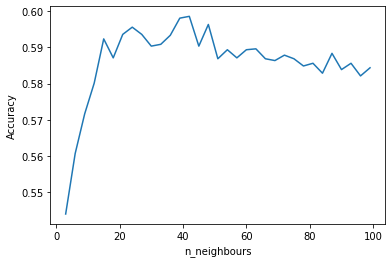

In [10]:
#plotting results
fig = plt.figure()
ax = plt.axes()
ax.plot(range(3, 100, 3), acc)
plt.xlabel('n_neighbours')
plt.ylabel('Accuracy')

### By increasing k-neighbours value, accuracy of the model insceases as well, for k <= ~40, so we can suppose that for k>=40,  the model starts to find values that aren't simmilar to each other - thus, the accuracy dicreases.

In [11]:
#defining x and y vector for beer dataset - regression
X2 = beer.iloc[:, 5:23].values
y2 = beer['review_overall'].values

In [12]:
#Splitting the data in train and test with train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

In [13]:
#training KNeighboursRegressor on second dataset, for different k values and storing mean squared error
mse = []
for i in range(3, 100, 3):
    reg = KNeighborsRegressor(n_neighbors=i)
    reg.fit(X_train2, y_train2)
    mse.append(mean_squared_error(reg.predict(X_test2), y_test2))

Text(0, 0.5, 'Mean_squared_error')

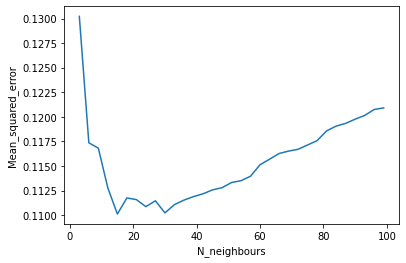

In [14]:
#plotting results
fig = plt.figure()
ax = plt.axes()
ax.plot(range(3, 100, 3), mse)
plt.xlabel('N_neighbours')
plt.ylabel('Mean_squared_error')

### The mean squared error has minimal values for  15 < k < 35, while it increases up to k = 15 and decreases after k =  35. If k < 15 , the neighbours found do not contain enough information, and for k > 35, the neighbours found are no more so related with eachother  because mean squared error increases.

In [15]:
#dataframe for classification
df = pd.DataFrame(columns = [i/100 for i in range(10, 101, 10) ], index=[ j for j in range(5,75,5)], dtype="float")

In [16]:
#function to train Decision Tree Classifier and Regressor
def classify(criterion, model, X_train, y_train, X_test, y_test):
    for i, d in zip(range(0, 14),  range(5,75,5)) :
        for j, f in zip(range(0, 10),range(10, 101, 10)) :
            clf = model(criterion = criterion, max_depth = d, max_features = f/100)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            #storing accuracy/error in a dataframe
            if model == DecisionTreeClassifier:
                df.iloc[i, j] = accuracy_score(y_pred, y_test)
            elif model == DecisionTreeRegressor:
                df.iloc[i, j] = mean_squared_error(y_pred, y_test)

Text(69.0, 0.5, 'Max_depth')

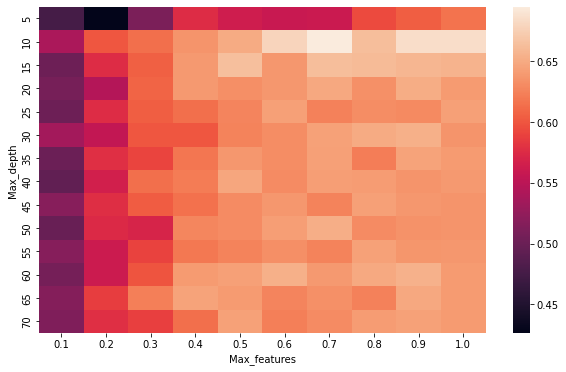

In [17]:
#training classifier with entropy criterion and plotting results
classify('entropy', DecisionTreeClassifier, X_train1, y_train1, X_test1, y_test1)
plt.figure(figsize=(10, 6))
sns.heatmap(df)
plt.xlabel('Max_features')
plt.ylabel('Max_depth')

### We can observe that we get the highest accuracy score for max_depth = 10 , and max_features = 0.7 
### This meanining that up to  only 10 nodes, or splits, the model can divide the informations and features the best, and the max_features meaning that he will consider up to  70% the features when splitting a node

Text(69.0, 0.5, 'Max_depth')

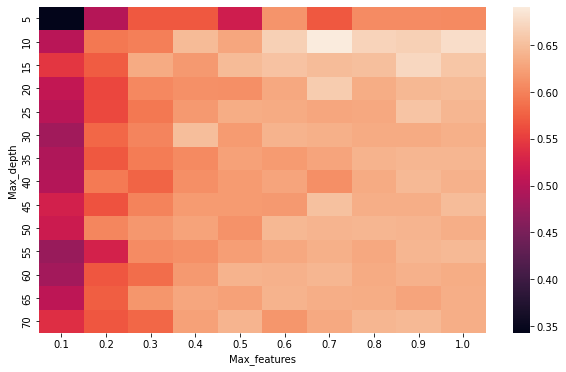

In [18]:
#training classifier with gini criterion and plotting results
classify('gini', DecisionTreeClassifier, X_train1, y_train1, X_test1, y_test1)
plt.figure(figsize=(10, 6))
sns.heatmap(df)
plt.xlabel('Max_features')
plt.ylabel('Max_depth')

### We can observe an overall improvement on accuracy with criterion set as gini, while max_depth remains the same - 10 for the highest accuracy score, the same with max_features - 0.7

Text(69.0, 0.5, 'Max_depth')

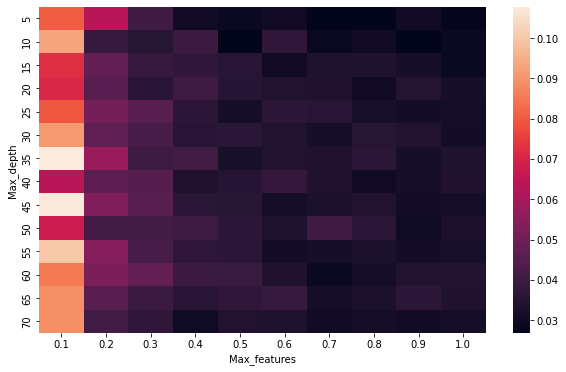

In [19]:
#training regressor with friedman_mse criterion and plotting results
classify('friedman_mse', DecisionTreeRegressor, X_train2, y_train2, X_test2, y_test2)
plt.figure(figsize=(10, 6))
sns.heatmap(df)
plt.xlabel('Max_features')
plt.ylabel('Max_depth')

### With friedman_mse we get and improvement on mean squared error with increasing the max_features, overall, while changing max_depth does not affect that much the error. 

Text(69.0, 0.5, 'Max_depth')

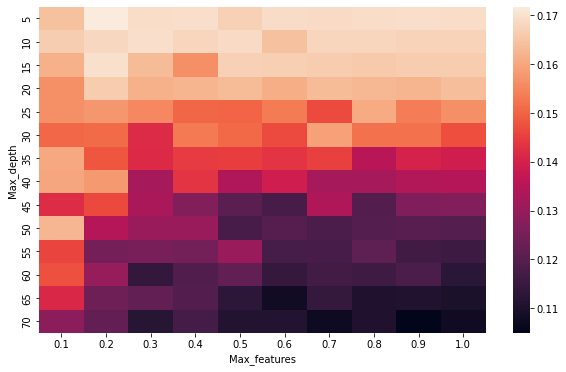

In [20]:
#training regressor with poisson criterion and plotting results
classify('poisson', DecisionTreeRegressor, X_train2, y_train2, X_test2, y_test2)
plt.figure(figsize=(10, 6))
sns.heatmap(df)
plt.xlabel('Max_features')
plt.ylabel('Max_depth')

### With poisson as criterion, we have a linear corellation between max_depth and max_ features - we get the lowest mean squared error for the highest value of max_depth and max_features as well, as well in the opposite, for decreasing

In [20]:
#function to train Random Forest Classifier and Regressor for different criterion and n_estimators
def train(clf, criterion, lists, X_train, y_train, X_test, y_test):
    for i in range(50,400,20):
        model = clf(n_estimators=i, criterion = criterion)
        model.fit(X_train, y_train)
        #getting the list with accuracy or error
        if clf ==RandomForestClassifier:
            lists.append(accuracy_score(model.predict(X_test), y_test))
        elif clf == RandomForestRegressor:
            lists.append(mean_squared_error(model.predict(X_test), y_test))

In [26]:
#training classifier with gini criterion
acc1 = []
train(RandomForestClassifier, 'gini', acc1, X_train1, y_train1, X_test1, y_test1)

In [22]:
#training classifier with entropy criterion
acc2 = []
train(RandomForestClassifier, 'entropy', acc2, X_train1, y_train1, X_test1, y_test1)

In [23]:
mse1 = []
train(RandomForestRegressor, 'squared_error', mse1, X_train2, y_train2, X_test2, y_test2)

In [24]:
mse2 = []
train(RandomForestRegressor, 'poisson', mse2, X_train2, y_train2, X_test2, y_test2)

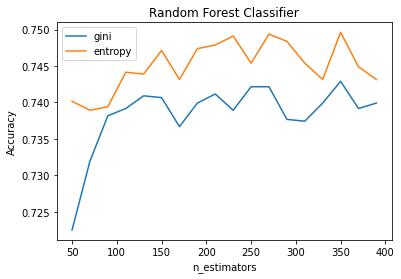

In [27]:
#plotting results
fig = plt.figure()
ax = plt.axes()
ax.plot(range(50,400,20), acc1, label ='gini')
ax.plot(range(50,400,20), acc2, label = 'entropy')
plt.title('Random Forest Classifier')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()

### For random forest classifier we have a decent accuracy, between 72% and 75%, with gini criterion we have a little bit  of a less accuracy overall

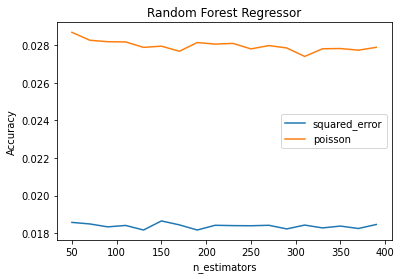

In [28]:
#plotting results
fig = plt.figure()
ax = plt.axes()
ax.plot(range(50,400,20), mse1, label ='squared_error')
ax.plot(range(50,400,20), mse2, label = 'poisson')
plt.title('Random Forest Regressor')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()

### Setting the criterion of the regressor model to squared error has improved the model prediction - as getting the lowest mean squared error values - while it doesn't depend much on n_estimators. The poisson criterion doesn't depend much on n_estimators either, but it has a higher mean squared error overall : + 0.01

In [30]:
#function to train on SVC and SVR, with diffrent kernel and C values
def train(clf, kernel, lists, X_train, y_train, X_test, y_test):
    for i in range(10, 101, 10):
        model = clf(C=i/100, kernel = kernel)
        model.fit(X_train, y_train)
        #storing accuracy or error in a list
        if clf ==SVC:
            lists.append(accuracy_score(model.predict(X_test), y_test))
        elif clf == SVR:
            lists.append(mean_squared_error(model.predict(X_test), y_test))

In [31]:
#Training SVC
acc3 = []
acc4 = []
acc5 = []
for l, c in zip([acc3, acc4, acc5], ['poly', 'rbf', 'sigmoid']): 
    train(SVC, c, l, X_train1, y_train1, X_test1, y_test1)

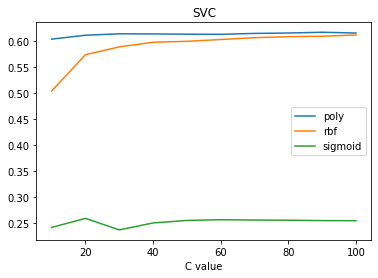

In [32]:
#plotting SVC results
fig = plt.figure()
ax = plt.axes()
ax.plot(range(10, 101, 10), acc3, label ='poly')
ax.plot(range(10, 101, 10), acc4, label = 'rbf')
ax.plot(range(10, 101, 10), acc5, label = 'sigmoid')
plt.title('SVC')
plt.xlabel('C value')
plt.legend()

### The SV classifier  has a very low accuracy score with kernel = sigmoid, with any value for C, for kernel = rbf we get a gradually improvement of accuracy with increasing C value, while for kernel = poly, the accuracy doesn't depend that much on n_estimators

In [225]:
#Training SVR
mse3 = []
mse4 = []
mse5 = []
for l, c in zip([mse3, mse4, mse5], ['poly', 'rbf', 'sigmoid']): 
    train(SVR, c, l, X_train2, y_train2, X_test2, y_test2)

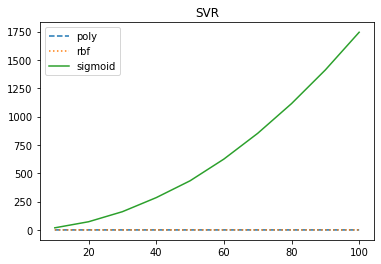

In [248]:
#plotting SVR results
fig = plt.figure()
ax = plt.axes()
ax.plot(range(10, 101, 10), mse3, label ='poly', linestyle = 'dashed')
ax.plot(range(10, 101, 10), mse4, label = 'rbf', linestyle = 'dotted')
ax.plot(range(10, 101, 10), mse5, label = 'sigmoid')
plt.title('SVR')
plt.legend()

 ### We can observe a increasing in error score with kernel = sigmoid, and a very low score for both poly and rbf kernel, lets look closer

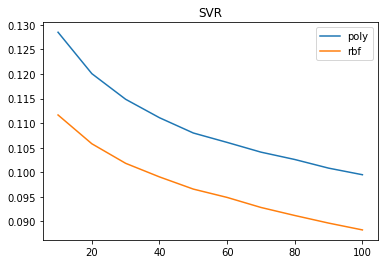

In [232]:
#Plotting SVR results for poly and rbf
fig = plt.figure()
ax = plt.axes()
ax.plot(range(10, 101, 10), mse3, label ='poly')
ax.plot(range(10, 101, 10), mse4, label = 'rbf')
#ax.plot(range(10, 101, 10), mse5, label = 'sigmoid')
plt.title('SVR')
plt.legend()

### We get a little lower value for error with rbf kernel - matching more with our dataset

In [23]:
#La ultimele ploturi nu am mai scris xlabel si ylabel pentru ca lua mult sa ruleze codul si 
#voiam sa termin mai repede :D